In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [7]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
df=pd.read_csv("./ola_data.csv")
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,registered
0,01/01/2011 00:00,Spring,No,Holiday,Clear,9.84,14.395,81,0.0,3,16,13
1,01/01/2011 01:00,Spring,No,Holiday,Clear,9.02,13.635,80,0.0,8,40,32


In [9]:
df.shape

(10886, 12)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  object 
 2   holiday     10886 non-null  object 
 3   workingday  10886 non-null  object 
 4   weather     10886 non-null  object 
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  count       10886 non-null  int64  
 11  registered  10886 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1020.7+ KB


In [11]:
df.describe()

,temp,atemp,humidity,windspeed,casual,count,registered
count,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,20.23086,23.655084,61.886460,12.799395,36.021955,191.574132,155.552177
std,7.79159,8.474601,19.245033,8.164537,49.960477,181.144454,151.039033
min,0.82000,0.760000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,13.94000,16.665000,47.000000,7.001500,4.000000,42.000000,36.000000
50%,20.50000,24.240000,62.000000,12.998000,17.000000,145.000000,118.000000
75%,26.24000,31.060000,77.000000,16.997900,49.000000,284.000000,222.000000
max,41.00000,45.455000,100.000000,56.996900,367.000000,977.000000,886.000000


In [12]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
count         0
registered    0
dtype: int64

In [13]:
df = df.dropna()

In [14]:
df.duplicated().sum()

0

In [15]:
df = df.drop_duplicates()

In [16]:
df.shape

(10886, 12)

In [17]:
num_cols = df.iloc[:,1:-1].select_dtypes(exclude='object').columns.values
num_cols

array(['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'count'],
      dtype=object)

In [18]:
le = LabelEncoder()

In [19]:
for i in df.iloc[:,1:-1].columns:
    if df[i].dtype == 'object':  
        df[i] = le.fit_transform(df[i])

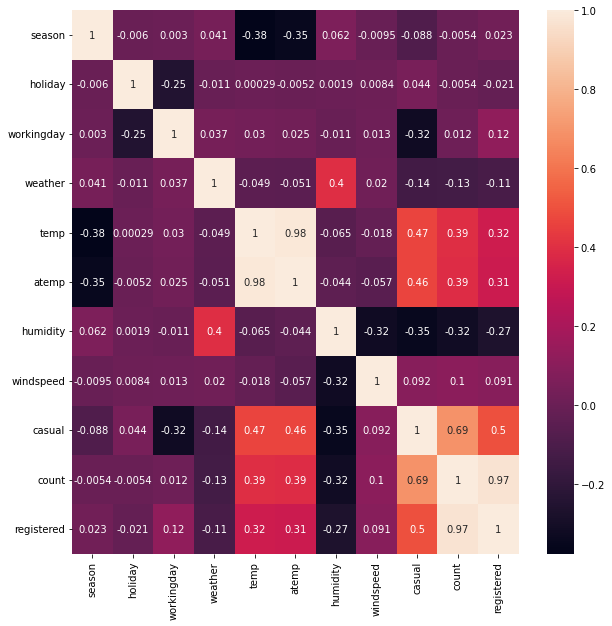

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [21]:
df.head(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count,registered
0,01/01/2011 00:00,1,0,0,0,9.84,14.395,81,0.0,3,16,13
1,01/01/2011 01:00,1,0,0,0,9.02,13.635,80,0.0,8,40,32


In [22]:
# Divide the data into “Attributes” and “labels”
X = df.iloc[:,1:-1]
y = df.iloc[:,-1]

In [23]:
y.value_counts()

3      195
4      190
5      177
6      155
2      150
      ... 
570      1
422      1
678      1
565      1
636      1
Name: registered, Length: 731, dtype: int64

In [24]:
le = LabelEncoder()
y = le.fit_transform(y)

In [25]:
# Split 80% of the data to the training set while 20% of the data to test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [26]:
sc = StandardScaler()
X_train[num_cols] = sc.fit_transform(X_train[num_cols])
X_test[num_cols] = sc.fit_transform(X_test[num_cols])

In [27]:
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,count
6638,1,0,1,0,0.411252,0.383168,-0.325373,-0.714232,0.147592,0.271851
7975,2,0,1,1,0.828587,0.649635,1.374426,0.815655,-0.129935,0.244420
5915,1,0,1,0,-0.214752,-0.150939,-0.376882,0.815655,-0.367816,0.189559
8050,2,0,1,0,1.037255,0.916688,-1.046499,-0.204270,1.218056,1.495246
5894,1,0,1,0,0.202584,0.205328,-0.531409,0.815655,-0.328169,0.771084
...,...,...,...,...,...,...,...,...,...,...
10833,3,0,1,1,-0.423419,-0.328779,1.322917,-0.459678,-0.585873,0.798514
5519,1,0,1,0,-1.571092,-1.484445,-0.582918,-0.841509,-0.724637,-1.044808
8217,0,0,1,1,1.871926,1.538834,-1.664608,-1.606880,0.960351,2.373018
5916,1,0,1,0,-0.423419,-0.328779,-0.428391,2.600096,-0.466933,1.401983


In [28]:
# Create a Linear Regression model and fit it
lr =LinearRegression()
model = lr.fit(X_train,y_train)

In [29]:
# Predicting the data
y_predict=model.predict(X_test)
y_predict

array([194.65009046, 202.92869078, 204.4135898 , ..., 524.17274913,
       421.26174731,  63.18165776])

In [30]:
from sklearn.metrics import accuracy_score
r2_score(y_predict,y_test)

0.9981531742274852

In [31]:
DT=DecisionTreeRegressor()
dt=DT.fit(X_train,y_train)
dt_pred=dt.predict(X_test)
dt_acc_score=r2_score(y_test,dt_pred)*100
(dt_acc_score)

99.83450056295888

In [32]:
RF=RandomForestRegressor()
rf=RF.fit(X_train,y_train)
rf_pred=rf.predict(X_test)
rf_acc_score=r2_score(y_test,rf_pred)*100
(rf_acc_score)

99.91781348197962